| Line                             | Purpose                                         |
| -------------------------------- | ----------------------------------------------- |
| `SentimentIntensityAnalyzer`     | Rule-based sentiment scoring                    |
| `WordCloud, STOPWORDS`           | Word cloud visualization, ignoring common words |
| `nltk.download('vader_lexicon')` | Downloads sentiment lexicon needed by VADER     |
| `pip install swifter`            | Accelerates row-wise functions on DataFrames    |


In [1]:
!pip install pandas nltk seaborn matplotlib vaderSentiment wordcloud openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('vader_lexicon')
!pip install swifter
!pip install torch
!pip install transformers

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import pandas as pd

# Load first few rows without headers
df_preview = pd.read_csv("Twitter_reviews.csv", encoding="latin1", header=None, nrows=5) #https://www.kaggle.com/datasets/kazanova/sentiment140
print(df_preview)

   0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


**Previewing the Dataset Structure (First 5 Rows)**

 Load the first 5 rows of the Tweets_reviews.csv file to inspect structure and determine appropriate headers


**Loading the Full Dataset with Error Handling and Separator Detection**

This section attempts to load the full dataset while handling potential formatting issues such as inconsistent delimiters. The python engine and sep=None allow automatic detection of separators, which is useful for messy or irregular CSV files.

**Assigning Column Names and Preparing Twitter Data**

This section assigns meaningful column names to the dataset based on the Sentiment140 format. It also tags the data with a platform column to distinguish it as Twitter data, which is useful if combining with other platforms later.

In [3]:
import pandas as pd

# Load the raw tweets CSV
try:
    df = pd.read_csv("Twitter_reviews.csv", encoding="latin1", header=None, engine='python')
except Exception as e:
    print("Initial read failed:", e)

# Reload with automatic separator detection (if needed)
df = pd.read_csv("Twitter_reviews.csv", encoding="latin1", header=None, engine='python', sep=None)

# Assign meaningful column names based on your screenshot
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Add platform column as 'Twitter'
df['platform'] = 'Twitter'

# Rename for clarity (optional but recommended)
twitter_df = df.copy()

# Check the data
print(twitter_df.head())
print("\nColumns:", twitter_df.columns)
print("\nShape:", twitter_df.shape)




   sentiment          id                          date     query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text platform  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  Twitter  
1    scotthamilton  is upset that he can't update his Facebook by ...  Twitter  
2         mattycus  @Kenichan I dived many times for the ball. Man...  Twitter  
3          ElleCTF    my whole body feels itchy and like its on fire   Twitter  
4           Karoli  @nationwideclass no, it's not behaving at all....  Twitter  

Columns: Index(['sentiment', 'id', 'date', 'query', 'user', 'text', 'platform'], dtype='object')

Shape:

In [4]:
# Count of sentiments
twitter_counts = twitter_df['sentiment'].value_counts()
print("\nSentiment counts in Twitter dataset:")
print(twitter_counts)

# Sample rows for sentiment = 0 and 4
print("\nSample row with sentiment = 0 (negative):")
print(twitter_df[twitter_df['sentiment'] == 0].iloc[0])

print("\nSample row with sentiment = 4 (positive):")
print(twitter_df[twitter_df['sentiment'] == 4].iloc[0])


Sentiment counts in Twitter dataset:
sentiment
0    800000
4    800000
Name: count, dtype: int64

Sample row with sentiment = 0 (negative):
sentiment                                                    0
id                                                  1467810369
date                              Mon Apr 06 22:19:45 PDT 2009
query                                                 NO_QUERY
user                                           _TheSpecialOne_
text         @switchfoot http://twitpic.com/2y1zl - Awww, t...
platform                                               Twitter
Name: 0, dtype: object

Sample row with sentiment = 4 (positive):
sentiment                                               4
id                                             1467822272
date                         Mon Apr 06 22:22:45 PDT 2009
query                                            NO_QUERY
user                                                ersle
text         I LOVE @Health4UandPets u guys r the best!! 
plat

**Loading and Preparing Amazon Review Data**

This section defines a custom function to load Amazon review data from .txt files (train and test sets). It extracts sentiment labels and text, converts sentiment to 'positive' or 'negative', and creates a unified DataFrame with a platform column for identification. Both train and test data are merged into a single DataFrame for easier analysis.



In [5]:
import pandas as pd

def load_amazon_data(file_path):
    data = []
    with open(file_path, encoding='utf-8', errors='ignore') as f:
        for line in f:
            if line.startswith("__label__"):
                label, text = line.strip().split(" ", 1)
                sentiment = 'positive' if label == "__label__2" else 'negative'
                data.append([sentiment, None, None, None, None, text])
    return pd.DataFrame(data, columns=['sentiment', 'id', 'date', 'query', 'user', 'text'])

# Load both files
amazon_train_df = load_amazon_data("train.ft.txt") #https://www.kaggle.com/datasets/bittlingmayer/amazonreviews
amazon_test_df = load_amazon_data("test.ft.txt")


amazon_train_df['platform'] = 'Amazon'
amazon_test_df['platform'] = 'Amazon'

# Combine both into one amazon dataframe (optional but useful)
amazon_df = pd.concat([amazon_train_df, amazon_test_df], ignore_index=True)

# Preview the result
print(amazon_df.head())
print("\nTotal reviews loaded:", len(amazon_df))


  sentiment    id  date query  user  \
0  positive  None  None  None  None   
1  positive  None  None  None  None   
2  positive  None  None  None  None   
3  positive  None  None  None  None   
4  positive  None  None  None  None   

                                                text platform  
0  Stuning even for the non-gamer: This sound tra...   Amazon  
1  The best soundtrack ever to anything.: I'm rea...   Amazon  
2  Amazing!: This soundtrack is my favorite music...   Amazon  
3  Excellent Soundtrack: I truly like this soundt...   Amazon  
4  Remember, Pull Your Jaw Off The Floor After He...   Amazon  

Total reviews loaded: 1722646


In [6]:
print(amazon_train_df.head())

  sentiment    id  date query  user  \
0  positive  None  None  None  None   
1  positive  None  None  None  None   
2  positive  None  None  None  None   
3  positive  None  None  None  None   
4  positive  None  None  None  None   

                                                text platform  
0  Stuning even for the non-gamer: This sound tra...   Amazon  
1  The best soundtrack ever to anything.: I'm rea...   Amazon  
2  Amazing!: This soundtrack is my favorite music...   Amazon  
3  Excellent Soundtrack: I truly like this soundt...   Amazon  
4  Remember, Pull Your Jaw Off The Floor After He...   Amazon  


In [7]:
print(amazon_test_df.head())

  sentiment    id  date query  user  \
0  positive  None  None  None  None   
1  positive  None  None  None  None   
2  negative  None  None  None  None   
3  positive  None  None  None  None   
4  positive  None  None  None  None   

                                                text platform  
0  Great CD: My lovely Pat has one of the GREAT v...   Amazon  
1  One of the best game music soundtracks - for a...   Amazon  
2  Batteries died within a year ...: I bought thi...   Amazon  
3  works fine, but Maha Energy is better: Check o...   Amazon  
4  Great for the non-audiophile: Reviewed quite a...   Amazon  


**Merging Twitter and Amazon Review Datasets**

This section merges the cleaned Twitter and Amazon review DataFrames into a single unified DataFrame combined_df for further sentiment analysis. This allows consistent processing and visualization across both platforms.

In [8]:
# Combine both dataframes
combined_df = pd.concat([ twitter_df, amazon_df], ignore_index=True)
print(f"Total records: {len(combined_df)}")

Total records: 3322646


In [9]:
combined_df.head()

,sentiment,id,date,query,user,text,platform
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Twitter
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Twitter
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Twitter
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Twitter
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Twitter


**Cleaning Text Data Using Vectorized Operations**

This section performs fast and efficient text cleaning using Pandas' vectorized string operations with the help of swifter for performance. It removes URLs, mentions, hashtags, punctuation, numbers, and extra spaces, and converts text to lowercase, storing the result in a new column clean_text.

Sample of 500000

In [10]:
import swifter
import pandas as pd

# Apply vectorized cleaning (much faster)
combined_df = combined_df.sample(n=500000, random_state=42).copy() #took sample data of 500000
# then run your cleaning code

combined_df['clean_text'] = (
    combined_df['text']
    .astype(str)
    .str.lower()
    .str.replace(r"http\S+|www\S+|https\S+", '', regex=True)
    .str.replace(r'\@[\w]+', '', regex=True)
    .str.replace(r'\#[\w]+', '', regex=True)
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\d+', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)



This command installs the vaderSentiment library for performing sentiment analysis using the VADER model, and tqdm for showing progress bars during long-running operations like sentiment scoring on large datasets.

In [11]:
pip install vaderSentiment tqdm

Note: you may need to restart the kernel to use updated packages.


**Applying VADER Sentiment Analysis with Progress Tracking**

This section applies the VADER sentiment analyzer to the cleaned text data. It classifies each review or tweet as positive, negative, or neutral based on the compound sentiment score. The tqdm library is used to display a progress bar, improving transparency during long processing times.

In [12]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# Enable progress bar
tqdm.pandas()

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(str(text))
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment function with progress bar
combined_df['vader_sentiment'] = combined_df['clean_text'].progress_apply(get_vader_sentiment)


100%|██████████| 500000/500000 [02:58<00:00, 2802.79it/s]


In [13]:
# Take a 500,000-row sample
sample_df = combined_df.sample(n=500000, random_state=42)

# Count how many rows are from each platform in the sample
platform_counts = sample_df['platform'].value_counts()

# Display the result
print("Number of rows selected from each platform in the 500,000 sample:")
print(platform_counts)


Number of rows selected from each platform in the 500,000 sample:
platform
Amazon     259443
Twitter    240557
Name: count, dtype: int64


**Word Cloud Visualization for Amazon and Twitter Reviews**

This section generates word clouds to visualize the most frequent words in Amazon and Twitter reviews. A random sample of 100,000 cleaned text entries is taken from each platform, and the combined words are displayed to highlight commonly used terms in user feedback. This helps in quickly spotting dominant topics or themes in the reviews.

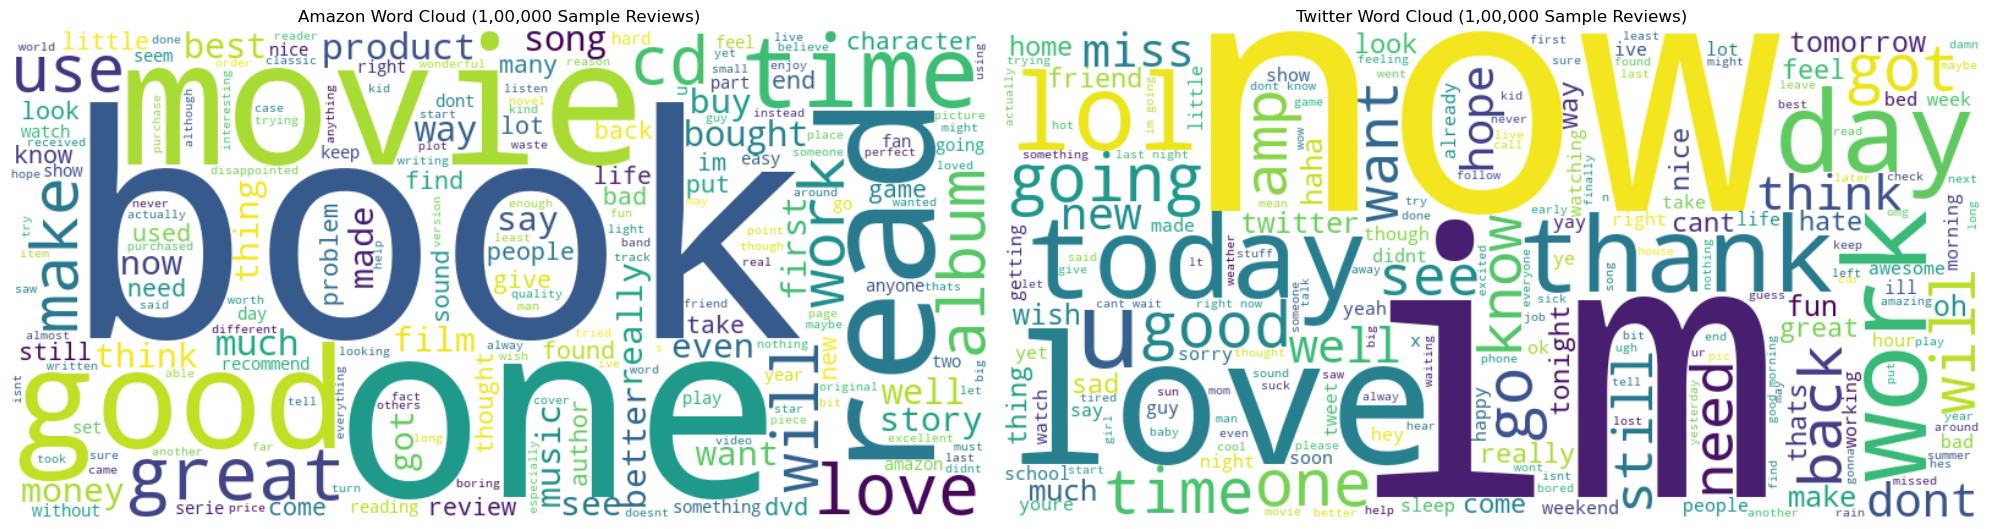

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Take 1,00,000 sample per platform
amazon_sample = combined_df[combined_df['platform'] == 'Amazon'].sample(n=100000, random_state=42)
twitter_sample = combined_df[combined_df['platform'] == 'Twitter'].sample(n=100000, random_state=42)

# Step 2: Concatenate all clean text
amazon_text = " ".join(amazon_sample['clean_text'].dropna().astype(str))
twitter_text = " ".join(twitter_sample['clean_text'].dropna().astype(str))

# Step 3: Generate WordClouds
amazon_wc = WordCloud(width=800, height=400, background_color='white').generate(amazon_text)
twitter_wc = WordCloud(width=800, height=400, background_color='white').generate(twitter_text)

# Step 4: Plot side-by-side
plt.figure(figsize=(20, 10))

# Amazon WordCloud
plt.subplot(1, 2, 1)
plt.imshow(amazon_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Amazon Word Cloud (1,00,000 Sample Reviews)")

# Twitter WordCloud
plt.subplot(1, 2, 2)
plt.imshow(twitter_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Twitter Word Cloud (1,00,000 Sample Reviews)")

plt.tight_layout()
plt.show()


**Sentiment Distribution Visualization (VADER) Across Platforms**

This section visualizes the distribution of VADER sentiment labels (positive, negative, neutral) across Amazon and Twitter reviews using a countplot. To improve performance, a sample of up to 400,000 rows is taken. This comparison helps identify how sentiment varies between platforms.

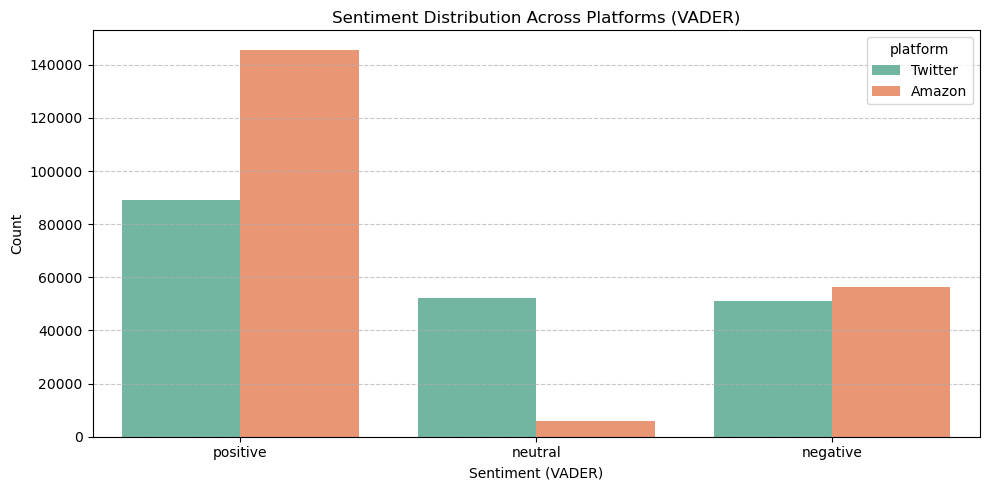

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce size of the data for plotting (optional but safer in Colab)
plot_df = combined_df[['vader_sentiment', 'platform']].dropna()
plot_df = plot_df.sample(n=400000, random_state=42) if len(plot_df) > 400000 else plot_df

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(data=plot_df, x='vader_sentiment', hue='platform', palette='Set2')
plt.title("Sentiment Distribution Across Platforms (VADER)")
plt.xlabel("Sentiment (VADER)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Filter Out Neutral Sentiments for Comparison with Original Labels**

This section filters out rows where the VADER sentiment is 'neutral', keeping only clearly positive or negative sentiments. This helps in making a more meaningful comparison with the original sentiment labels. A random sample of 20,000 rows is also taken to ensure efficient processing and plotting.

In [16]:
# Remove rows with neutral from VADER if not present in original labels
compare_df = combined_df[combined_df['vader_sentiment'] != 'neutral']

# Optional: Reduce to a manageable sample for Colab
compare_df = compare_df.sample(n=400000, random_state=42) if len(compare_df) > 400000 else compare_df


**Compare VADER Sentiment with Original Labels and Visualize Agreement**

This section maps the original sentiment labels (Twitter: 0/4, Amazon: 'positive'/'negative') to a consistent format, removes neutral predictions, and calculates the percentage of agreement between VADER predictions and the original labels. A confusion matrix heatmap is also plotted to visually compare how well VADER aligns with the ground truth sentiment.



VADER Agreement with Original Sentiment Labels: 72.34%


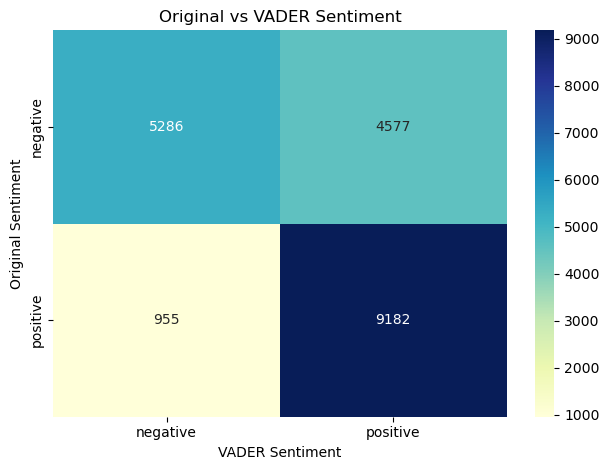

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Map original sentiment values (0 and 4 for Twitter, 'positive' and 'negative' for Amazon)
def map_original_sentiment(sentiment):
    if sentiment == 0:
        return 'negative'
    elif sentiment == 4:
        return 'positive'
    elif sentiment == 'positive':
        return 'positive'
    elif sentiment == 'negative':
        return 'negative'
    else:
        return None # Handle any other unexpected values

combined_df['original_sentiment'] = combined_df['sentiment'].apply(map_original_sentiment)


# Remove 'neutral' from VADER and rows where original_sentiment is None
compare_df = combined_df[(combined_df['vader_sentiment'] != 'neutral') & (combined_df['original_sentiment'].notna())].copy()

# Sample if dataset is too large (for safe Colab execution)
compare_df = compare_df.sample(n=20000, random_state=42) if len(compare_df) > 20000 else compare_df

# Agreement Score
if not compare_df.empty:
    agreement = (compare_df['vader_sentiment'] == compare_df['original_sentiment']).mean() * 100
    print(f"VADER Agreement with Original Sentiment Labels: {agreement:.2f}%")

    # Heatmap
    sns.heatmap(pd.crosstab(compare_df['original_sentiment'], compare_df['vader_sentiment']),
                annot=True, fmt='d', cmap='YlGnBu')
    plt.title("Original vs VADER Sentiment")
    plt.xlabel("VADER Sentiment")
    plt.ylabel("Original Sentiment")
    plt.tight_layout()
    plt.show()
else:
    print("compare_df is empty after filtering. Cannot compute agreement or generate heatmap.")

**Time-Based Sentiment Trend Analysis**

This plot shows how sentiments (positive, negative, neutral) change over time using monthly trends from the vader_sentiment column. It helps identify spikes or drops in sentiment, revealing patterns like reactions to events or seasonal shifts.


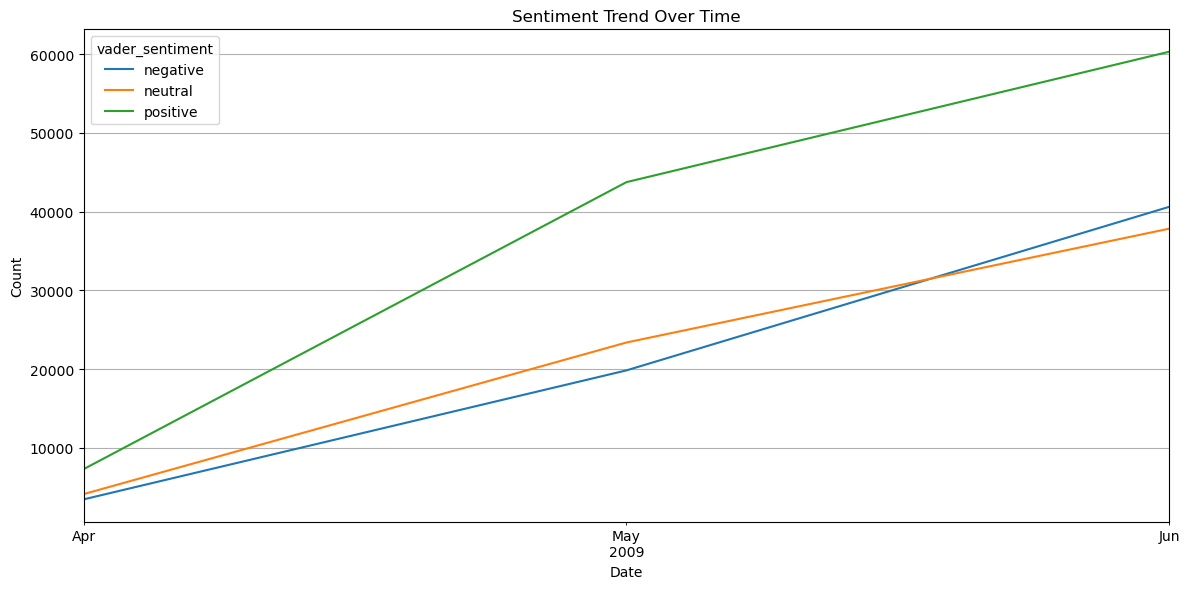

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime (if not already)
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')

# Drop NaT dates and group
time_df = combined_df.dropna(subset=['date'])
time_df = time_df.groupby([pd.Grouper(key='date', freq='M'), 'vader_sentiment']).size().unstack().fillna(0)

# Plot
time_df.plot(figsize=(12, 6), title='Sentiment Trend Over Time')
plt.ylabel("Count")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


**BERT vs VADER Sentiment Comparison**

This section compares VADER (rule-based) and BERT (transformer-based) sentiment predictions. We use a pre-trained BERT model (distilbert-base-uncased-finetuned-sst-2-english) to classify 500 sampled reviews. BERT is better at understanding context, sarcasm, and complex sentence structures, making it ideal for nuanced sentiment analysis. The plot shows how BERT and VADER agree or differ in classifying sentiments as positive or negative.

| Feature              | **VADER**                                     | **BERT**                                                   |
| -------------------- | --------------------------------------------- | ---------------------------------------------------------- |
| **Type**             | Rule-based (lexicon)                          | Transformer-based (deep learning)                          |
| **Speed**            | Very fast                                     | Slower (especially on large datasets)                      |
| **Context Handling** | Poor (word-level only)                        | Excellent (understands full sentence context)              |
| **Sarcasm/Irony**    | Fails to detect                               | Better at detecting subtle cues like sarcasm               |
| **Sentiment Labels** | Positive, Negative, Neutral                   | Positive, Negative (no neutral in base model)              |
| **Customizable**     | Easy to tune with custom lexicon              | Requires retraining or fine-tuning for domain-specific use |
| **Ideal Use**        | Quick, simple social media or review analysis | In-depth analysis, nuanced or complex texts                |


* This bar plot compares the sentiment classifications made by two
models—VADER and BERT—on the same set of 500 text samples.
*  X-axis: Shows the sentiment predicted by BERT (positive and negative only, since the BERT model used doesn't output "neutral").
* Hue (colors): Represents the sentiment predicted by VADER (positive, negative, and neutral).
* Y-axis: Shows the number of samples (Count) falling into each sentiment category.
* Most texts BERT labeled as positive were also marked positive by VADER, with few disagreements as negative or neutral.
* For negative sentiments, BERT identifies more texts as negative than VADER does, suggesting that BERT captures contextual negativity better.


Device set to use cpu


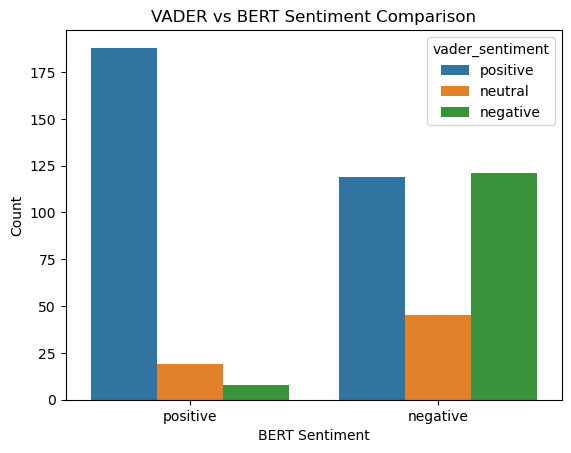

In [19]:
from transformers import pipeline
import torch

# Load BERT sentiment pipeline
bert_classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Sample 500 rows for demo due to speed
sample_df = combined_df.sample(n=500, random_state=42).copy()
sample_df['bert_sentiment'] = sample_df['clean_text'].apply(lambda x: bert_classifier(x)[0]['label'].lower())

# Plot comparison
sns.countplot(data=sample_df, x='bert_sentiment', hue='vader_sentiment')
plt.title("VADER vs BERT Sentiment Comparison")
plt.xlabel("BERT Sentiment")
plt.ylabel("Count")
plt.show()


**Top N-gram Phrase Analysis (Amazon and Twitter Reviews)**

This section extracts and displays the most frequent bigrams (2-word phrases) and trigrams (3-word phrases) from a 50,000-review Amazon sample using CountVectorizer. It helps identify common patterns or phrases used by customers in their feedback.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer


# Function to extract top N-grams
def extract_ngrams(data, ngram_range, platform_name, max_features=20, sample_size=50000):
    # Adjust sample size for platforms with fewer samples if needed
    current_platform_data = data[data['platform'] == platform_name]
    actual_sample_size = min(sample_size, len(current_platform_data))

    if actual_sample_size == 0:
        print(f"Warning: No data available for platform '{platform_name}' to extract n-grams.")
        return []

    sample = current_platform_data.sample(n=actual_sample_size, random_state=42)
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=max_features)
    ngram_counts = vectorizer.fit_transform(sample['clean_text'])
    return vectorizer.get_feature_names_out()

# Top 20 Amazon Bigrams and Trigrams (using default sample size of 50000)
amazon_bigrams = extract_ngrams(combined_df, (2, 2), 'Amazon', sample_size=50000)
amazon_trigrams = extract_ngrams(combined_df, (3, 3), 'Amazon', sample_size=50000)
print("Top 20 Amazon Bigrams:", amazon_bigrams)
print("Top 20 Amazon Trigrams:", amazon_trigrams)

# Top 20 Twitter Bigrams and Trigrams
twitter_bigrams = extract_ngrams(combined_df, (2, 2), 'Tweets', sample_size=50000)
twitter_trigrams = extract_ngrams(combined_df, (3, 3), 'Tweets', sample_size=50000)
print("Top 20 Twitter Bigrams:", twitter_bigrams)
print("Top 20 Twitter Trigrams:", twitter_trigrams)

Top 20 Amazon Bigrams: ['book read' 'dont buy' 'dont know' 'dont think' 'dont waste' 'good book'
 'great book' 'highly recommend' 'im sure' 'ive read' 'long time'
 'pretty good' 'read book' 'reading book' 'recommend book' 'save money'
 'waste money' 'waste time' 'year old' 'years ago']
Top 20 Amazon Trigrams: ['best book read' 'best books read' 'book ive read' 'book read book'
 'book years ago' 'books ive read' 'did great job' 'does good job'
 'does great job' 'dont waste money' 'dont waste time'
 'highly recommend book' 'love love love' 'movie ive seen'
 'save money buy' 'total waste money' 'waste money time'
 'waste time money' 'year old daughter' 'year old son']
Top 20 Twitter Bigrams: []
Top 20 Twitter Trigrams: []


**Modeling with LDA (Amazon & Twitter)**

This section uses Latent Dirichlet Allocation (LDA) to uncover hidden topics in customer reviews. It identifies key themes by grouping similar words frequently appearing together. Separate topic models are built for Amazon and Twitter data to compare common discussion themes across platforms.

**Latent Dirichlet Allocation (LDA)**

LDA assumes that:

* Each document (text/review) is made up of a mix of topics.
* Each topic is made up of a mix of words that frequently occur together.
* LDA uses this assumption to reverse-engineer the topics from the text data without needing labeled data.


Working:
* Input: Cleaned text data (like customer reviews).
* Vectorization: The text is converted into a numerical form (Bag-of-Words).
* Topic Extraction: LDA identifies word patterns and assigns each document a distribution over topics.

Output: It returns:
* A list of topics (keywords defining each topic).
* The distribution of topics in each document.

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

def run_lda_topic_modeling(df, platform_name, n_topics=5, sample_size=20000):
    # Filter valid clean_text entries
    platform_df = df[(df['platform'] == platform_name) & (df['clean_text'].notna())]

    # Handle case when sample size exceeds available rows
    actual_sample_size = min(sample_size, len(platform_df))
    if actual_sample_size == 0:
        print(f"\n⚠️ No valid clean_text entries found for platform: {platform_name}")
        return

    # Sampling and vectorization
    corpus = platform_df['clean_text'].sample(n=actual_sample_size, random_state=42)
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    X = vectorizer.fit_transform(corpus)

    # Fit LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    # Display top keywords for each topic
    words = vectorizer.get_feature_names_out()
    print(f"\n🔹 Top {n_topics} Topics for {platform_name}:")
    for idx, topic in enumerate(lda.components_):
        print(f"\nTopic #{idx + 1}:")
        print(" ".join([words[i] for i in topic.argsort()[-10:]]))

# Run for Amazon
run_lda_topic_modeling(combined_df, platform_name='Amazon')

# Run for Twitter
run_lda_topic_modeling(combined_df, platform_name='Twitter')



🔹 Top 5 Topics for Amazon:

Topic #1:
dont time great really story film good just like movie

Topic #2:
just amazon use buy money bought work time great product

Topic #3:
time story life author good great reading books read book

Topic #4:
song best just songs good great music like album cd

Topic #5:
price quality use dont great product just good game like

🔹 Top 5 Topics for Twitter:

Topic #1:
watch thing ill days going twitter thats lol just im

Topic #2:
day amp great didnt thank got night morning good just

Topic #3:
think come did today getting new like sad time im

Topic #4:
need thanks love like just work im really know dont

Topic #5:
wish miss work like tomorrow home going im today day
